In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT/Dataset/train.csv")

In [18]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
features = data[["Segment", "Country", "City", "State", "Sales"]]
top_10_sales = features.nlargest(10, "Sales")
print("Top 10 Sales Revenue: ")
print(top_10_sales)

Top 10 Sales Revenue: 
          Segment        Country           City         State      Sales
2697  Home Office  United States   Jacksonville       Florida  22638.480
6826    Corporate  United States      Lafayette       Indiana  17499.950
8153     Consumer  United States        Seattle    Washington  13999.960
2623  Home Office  United States  New York City      New York  11199.968
4190     Consumer  United States         Newark      Delaware  10499.970
9039     Consumer  United States        Detroit      Michigan   9892.740
4098     Consumer  United States    Minneapolis     Minnesota   9449.950
4277    Corporate  United States       Lakewood    New Jersey   9099.930
8488     Consumer  United States      Arlington      Virginia   8749.950
6425     Consumer  United States   Philadelphia  Pennsylvania   8399.976


Text(0, 0.5, 'Total Sales')

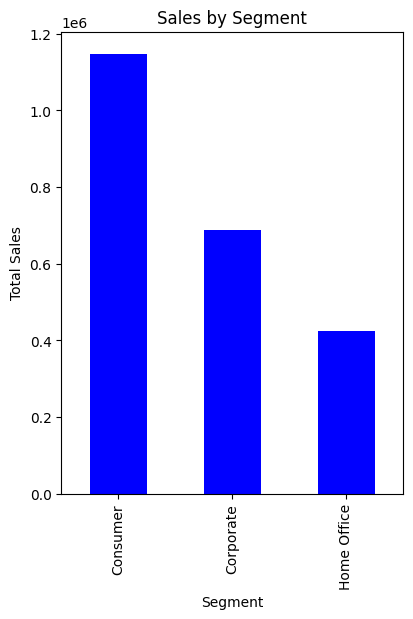

In [20]:
segment_sales = data.groupby("Segment")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
segment_sales.plot(kind="bar", color="blue")
plt.title("Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")

Text(0, 0.5, 'Total Sales')

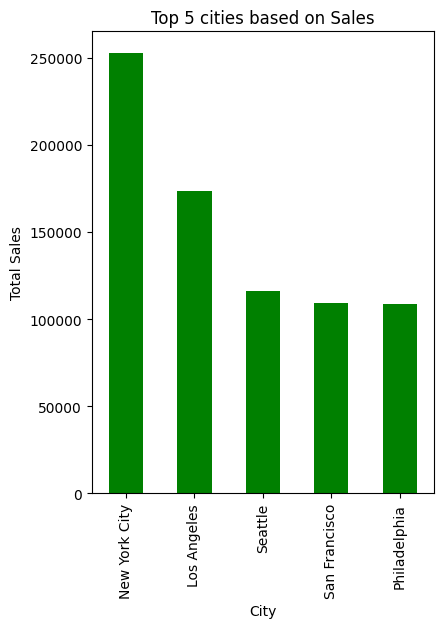

In [23]:
segment_sales = data.groupby("City")["Sales"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
segment_sales.plot(kind="bar", color="green")
plt.title("Top 5 cities based on Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")

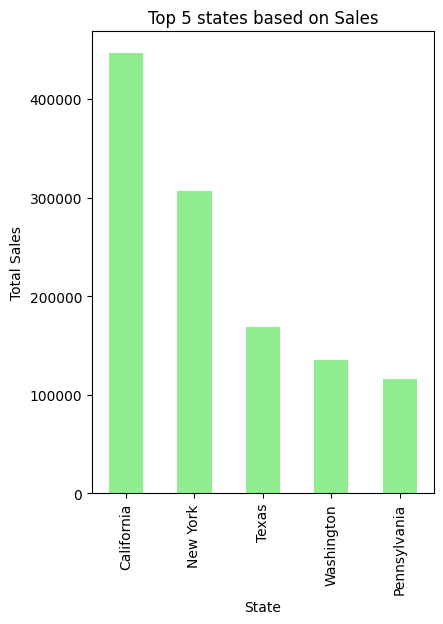

In [26]:
segment_sales = data.groupby("State")["Sales"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
segment_sales.plot(kind="bar", color="lightgreen")
plt.title("Top 5 states based on Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

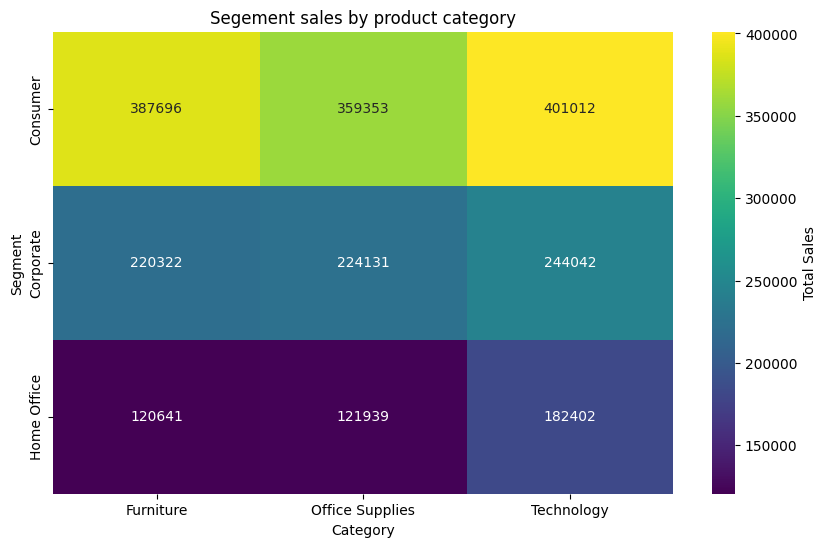

In [31]:
heatmap_data = data.pivot_table(index="Segment", columns="Category", values="Sales", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".0f", cbar_kws={"label":"Total Sales"})
plt.title("Segement sales by product category")
plt.show()